# tSNE of scaled expression data

Data preprocessing:
- 1.) QC by cell type and region; (N genes, library size (3 MADs below or above), mt proportion (4 MADs above)).
- 2.) Remove genes that were not expressed in most cells, based on the whole dataset; (N cells expressed <= 15 and mean expression <= 0.0001).
- 3.) Scaling with sctranfrom from Seurat on either whole dataset or on each region separately, following the Seurat dataset integration workflow for batch effect correction. 

This workflow:
- Comparison of tSNE with batch corrected and uncorrected data
- Embedding of cells from one region to tSNE of the other region

In [2]:
import h5py
import random

from tsne_functions import *

In [2]:
col_data=pd.read_table('passedQC_cellData.tsv',index_col=0)
col_by_region=col_data.groupby('region')
fov_cells=col_by_region.get_group('fov').index
per_cells=col_by_region.get_group('per').index

In [3]:
with h5py.File('scaledata.h5','r') as file:

    #As h5 file was saved in R it is imported as transposed
    data_int=pd.DataFrame(file.get('integrated/matrix')[:file.get('integrated/matrix').shape[0],:])
    data_int.columns=[name.decode() for name in file.get('integrated/rownames')]
    data_int.index=[name.decode() for name in file.get('integrated/colnames')[:file.get('integrated/colnames').shape[0]]]

    data_nb=pd.DataFrame(file.get('nobatch/matrix')[:file.get('nobatch/matrix').shape[0],:])
    data_nb.columns=[name.decode() for name in file.get('nobatch/rownames')]
    data_nb.index=[name.decode() for name in file.get('nobatch/colnames')[:file.get('nobatch/colnames').shape[0]]]

Figure out tsne parameters

In [4]:
#sample=random.sample(list(data_int.index),5000)
#data1=data_int.loc[sample,:]
#col_data1=col_data.loc[data1.index,:]


In [5]:
#tsne1=make_tsne(data1,perplexities_range=[50,500],
 #                   exaggerations=[12,1.2],momentums=[0.6,0.95])

In [6]:
#plot_tsne([tsne1], classes=[dict(zip(col_data1.index,col_data1['cell_type']))], names=[data1.index], legend=True,
#              plotting_params = [{'alpha': 0.2,'s':1}])
#plot_tsne([tsne1], classes=[dict(zip(col_data1.index,col_data1['region']))], names=[data1.index], legend=True,
#              plotting_params = [{'alpha': 0.2,'s':1}])

# tSNE on  both regions

Region: fov - foveal, per - peripheral 

Cell type: BC - Bipolar Cells, HC - Horizontal Cells, AC - Amacrine
Cells, RGC - Retinal Ganglion Cells, PR - photoreceptor, EpiImmune - epithelial and immune?

## Seurat scaled and batch (region) corrected data

In [7]:
tsne_int=make_tsne(data_int)
col_data_int=col_data.loc[data_int.index,:]

/home/khrovatin/miniconda3/lib/python3.7/site-packages/openTSNE/nearest_neighbors.py:184: UserWarning: `pynndescent` has recently changed which distance metrics are supported, and `openTSNE.nearest_neighbors` has not been updated. Please notify the developers of this change.
  "`pynndescent` has recently changed which distance metrics are supported, "
/home/khrovatin/miniconda3/lib/python3.7/site-packages/numba/ir_utils.py:1969: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'forest' of function 'initialise_search'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../miniconda3/lib/python3.7/site-packages/pynndescent/pynndescent_.py", line 72:
@numba.njit()
def initialise_search(
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


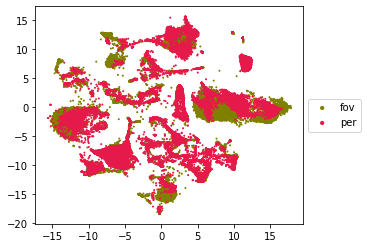

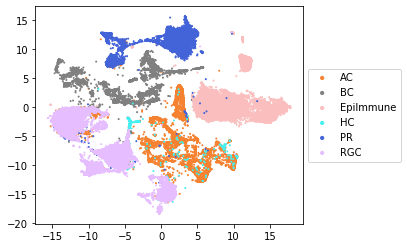

In [8]:
plot_tsne([tsne_int],[dict(zip(col_data_int.index,col_data_int['region']))],[ data_int.index], legend=True)
plot_tsne([tsne_int],[dict(zip(col_data_int.index,col_data_int['cell_type']))], [data_int.index], legend=True)

## Seurat scaled data

/home/khrovatin/miniconda3/lib/python3.7/site-packages/openTSNE/nearest_neighbors.py:184: UserWarning: `pynndescent` has recently changed which distance metrics are supported, and `openTSNE.nearest_neighbors` has not been updated. Please notify the developers of this change.
  "`pynndescent` has recently changed which distance metrics are supported, "
/home/khrovatin/miniconda3/lib/python3.7/site-packages/numba/ir_utils.py:1969: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'forest' of function 'initialise_search'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../miniconda3/lib/python3.7/site-packages/pynndescent/pynndescent_.py", line 72:
@numba.njit()
def initialise_search(
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


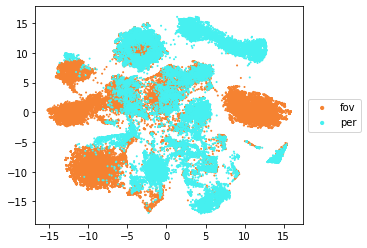

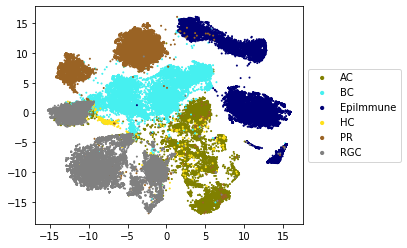

In [4]:
tsne_nb=make_tsne(data_nb)
col_data_nb=col_data.loc[data_nb.index,:]
plot_tsne([tsne_nb],[dict(zip(col_data_nb.index,col_data_nb['region']))], [data_nb.index], legend=True)
plot_tsne([tsne_nb],[dict(zip(col_data_nb.index,col_data_nb['cell_type']))], [data_nb.index], legend=True)

In batch corrected data all cell types overlap on tSNE. This is not treu for batch uncorrected data, indicating that batch effects are present.

# Embeding of cells from one region to tSNE of another region

One of the regions was used for initialisation of tSNE embedding and learning of KNN classifier on tSNE data (30 neighbours, default Sklearn KNN classifier parameters). The other was then embedded on the tSNE (higher opacity) and used to test the KNN classification (results shown in table).

## Batch corrected

### tSNE on fov, embedding of per

/home/khrovatin/miniconda3/lib/python3.7/site-packages/openTSNE/nearest_neighbors.py:184: UserWarning: `pynndescent` has recently changed which distance metrics are supported, and `openTSNE.nearest_neighbors` has not been updated. Please notify the developers of this change.
  "`pynndescent` has recently changed which distance metrics are supported, "
/home/khrovatin/miniconda3/lib/python3.7/site-packages/numba/ir_utils.py:1969: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'forest' of function 'initialise_search'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../miniconda3/lib/python3.7/site-packages/pynndescent/pynndescent_.py", line 72:
@numba.njit()
def initialise_search(
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


   cell_type  precision    recall    fscore  N true
0         AC   0.999259  0.958100  0.978246   23914
1         BC   0.993490  0.994353  0.993922    9209
2  EpiImmune   0.999100  0.998412  0.998756   18895
3         HC   0.393235  0.989362  0.562784     188
4         PR   0.992989  0.977415  0.985141    7970
5        RGC   0.913553  0.978244  0.944792   11721


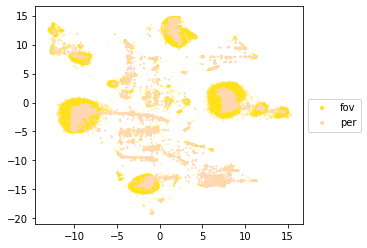

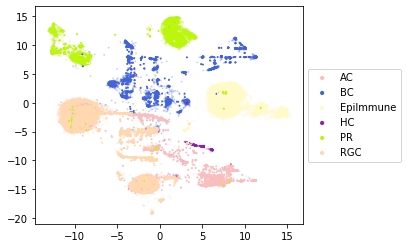

In [4]:
tsne_data1=analyse_tsne(data_int.loc[fov_cells,:],data_int.loc[per_cells,:],col_data=col_data)

### tSNE on per, embedding of fov

/home/khrovatin/miniconda3/lib/python3.7/site-packages/openTSNE/nearest_neighbors.py:184: UserWarning: `pynndescent` has recently changed which distance metrics are supported, and `openTSNE.nearest_neighbors` has not been updated. Please notify the developers of this change.
  "`pynndescent` has recently changed which distance metrics are supported, "


   cell_type  precision    recall    fscore  N true
0         AC   0.973468  0.983945  0.978679    5668
1         BC   0.999951  0.981404  0.990591   20596
2  EpiImmune   0.999938  0.999813  0.999875   16007
3         HC   1.000000  0.602663  0.752077    1953
4         PR   0.994775  0.999803  0.997283   15233
5        RGC   0.958688  0.997430  0.977675   25290


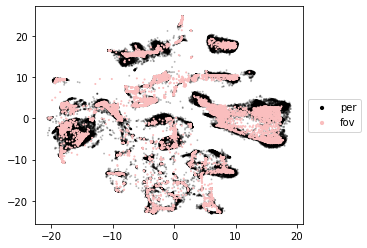

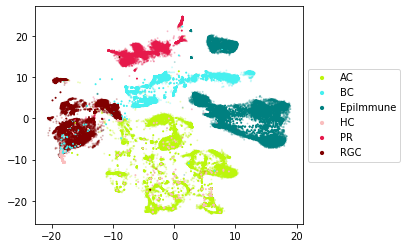

In [5]:
tsne_data2=analyse_tsne(data_int.loc[per_cells,:],data_int.loc[fov_cells,:],col_data=col_data)

## Not batch corrected

### tSNE of fov, embedding of per

/home/khrovatin/miniconda3/lib/python3.7/site-packages/openTSNE/nearest_neighbors.py:184: UserWarning: `pynndescent` has recently changed which distance metrics are supported, and `openTSNE.nearest_neighbors` has not been updated. Please notify the developers of this change.
  "`pynndescent` has recently changed which distance metrics are supported, "


   cell_type  precision    recall    fscore  N true
0         AC   0.995140  0.941959  0.967820   23914
1         BC   0.971807  0.980671  0.976219    9209
2  EpiImmune   0.997668  0.996242  0.996955   18895
3         HC   0.753086  0.973404  0.849188     188
4         PR   0.989279  0.972522  0.980829    7970
5        RGC   0.892950  0.992066  0.939902   11721


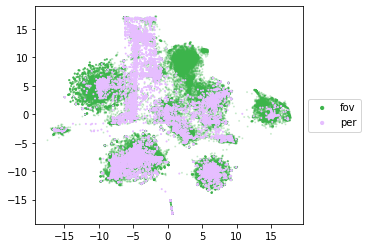

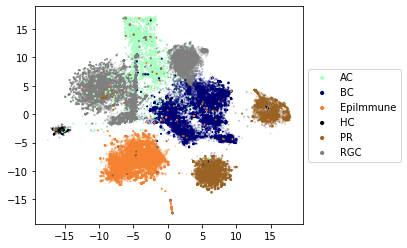

In [6]:
tsne_data3=analyse_tsne(data_nb.loc[fov_cells,:],data_nb.loc[per_cells,:],col_data=col_data)

### tSNE of per, embedding of fov

/home/khrovatin/miniconda3/lib/python3.7/site-packages/openTSNE/nearest_neighbors.py:184: UserWarning: `pynndescent` has recently changed which distance metrics are supported, and `openTSNE.nearest_neighbors` has not been updated. Please notify the developers of this change.
  "`pynndescent` has recently changed which distance metrics are supported, "


   cell_type  precision    recall    fscore  N true
0         AC   0.943338  0.978123  0.960416    5668
1         BC   0.997477  0.978831  0.988066   20596
2  EpiImmune   0.999186  0.997251  0.998218   16007
3         HC   0.994114  0.778290  0.873061    1953
4         PR   0.997248  0.999081  0.998164   15233
5        RGC   0.975669  0.998932  0.987164   25290


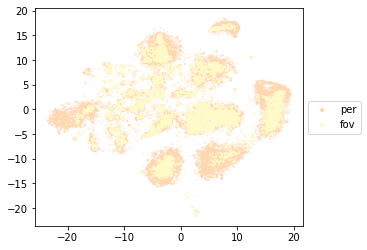

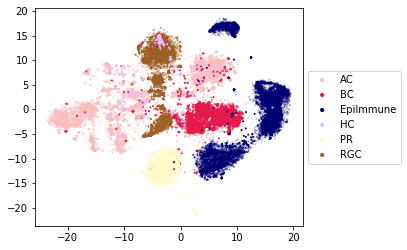

In [7]:
tsne_data4=analyse_tsne(data_nb.loc[per_cells,:],data_nb.loc[fov_cells,:],col_data=col_data)

- When peripheral cells are used to initialise tSNE and fovelar cells are latter embedded in this space the cell types seem to separate better.
- Even when using non batch corrected data the cell types overlap on tSNE. This was not true when performing tSNE embedding on whole dataset at once, indicating that this two-stage embedding may have potential in removal of batch effects.